# [[데이콘] 영화 리뷰 감성 분석](https://dacon.io/competitions/official/235995/overview/description)

**참고 사이트**  
[【실습】 Python >> Text Mining -- 감성 분류 분석 (호텔 리뷰 데이터)](https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/)  
[[자연어 처리] konlpy 설치 오류, okt()에러-already loaded in](https://byeon-sg.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-konlpy-%EC%84%A4%EC%B9%98-%EC%98%A4%EB%A5%98-okt%EC%97%90%EB%9F%AC-already-loaded-in-another-classloader-SystemErro-1)  
[tqdm 사용법-python 진행률 프로세스바](https://skillmemory.tistory.com/entry/tqdm-%EC%82%AC%EC%9A%A9%EB%B2%95-python-%EC%A7%84%ED%96%89%EB%A5%A0-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EB%B0%94)  
[Scikit-Learn의 문서 전처리 기능](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)  
[감성 분석](https://datascienceschool.net/03%20machine%20learning/11.03%20%EA%B0%90%EC%84%B1%20%EB%B6%84%EC%84%9D.html)  
[classification_report로 평가 지표 확인하기
[출처] classification_report로 평가 지표 확인하기|작성자 6시 내 교양](https://blog.naver.com/PostView.naver?blogId=hannaurora&logNo=222498671200&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search)  
[[ML] sklearn.pipeline](https://velog.io/@imfromk/MLsklearn-Pipeline)  
[[Machine Learning] 가짜 뉴스 분류 모델 - 파라미터 튜닝](https://hangjastar.tistory.com/169)  
[02-06 정수 인코딩(Integer Encoding)](https://wikidocs.net/31766)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # 코드 진행률 프로세스 바
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터 살펴보기
### 1) 데이터 불러오기

In [7]:
train = pd.read_csv('/content/sample_data/train.csv')[['document', 'label']]
test = pd.read_csv('/content/sample_data/test.csv')[['document']]
submission = pd.read_csv('/content/sample_data/sample_submission.csv')

In [ ]:
train.info()

In [5]:
print(len(train))
print(len(test))

150000
50000


### 2) train 데이터 정제

In [6]:
# 중복 행 찾기
train[train['document'].duplicated()]

,document,label
1058,4,0
1097,쵝오,1
1248,최고,1
1483,최고,1
1707,재밌다,1
...,...,...
149919,짱,1
149949,OO 영화,0
149960,지루하다,0
149966,1,0


In [8]:
# 중복 행 제거
train.drop_duplicates(['document'], inplace=True)
len(train)

146183

In [9]:
# 결측치 확인
train.isnull().sum()

document    1
label       0
dtype: int64

In [10]:
# 결측치 행 확인
train[train['document'].isnull()]

,document,label
25857,NaN,1


In [11]:
# 결측치 행 제거
train.dropna(axis=0, inplace=True)

# 결측치 확인
train.isnull().sum()

document    0
label       0
dtype: int64

In [11]:
len(train)

146182

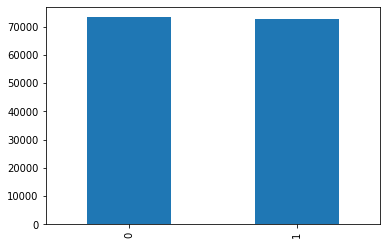

In [12]:
# 중복을 제거한 train.label 분포
train.label.value_counts().plot(kind='bar');

In [13]:
train.label.value_counts()

0    73342
1    72840
Name: label, dtype: int64

## 2. 텍스트 전처리
### 1) 정규 표현식 적용

In [12]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(text):
    hangle = re.compile('[^ ㄱ-ㅣ 가-힣]') # 한글 추출 규칙: 띄어 쓰기(1개)를 포함한 한글
    result = hangle.sub("", text) # 위에 설정한 "hangul" 규칙을 "text"에 적용(.sub)시킴
    return result

In [13]:
train['document'] = train['document'].apply(apply_regular_expression)
train

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...
149995,인간이 문제지 소는 뭔죄인가,0
149996,평점이 너무 낮아서,1
149997,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


### ~~한글 맞춤법 검사~~
처리 시간 문제로 생략

In [ ]:
# # !pip install py-hanspell
# from hanspell import spell_checker

# # 동작 테스트
# sent_test = "한글 맞춤법검사기 재대로작동돼는지테스트"
# spelled_sent_test = spell_checker.check(sent_test)
# checked_sent_test = spelled_sent_test.checked

# print("<맞춤법 검사 테스트 수행>")
# print("교정 前: ",sent_test)
# print("교정 後: ",checked_sent_test)

In [ ]:
# for i in tqdm(range(len(train_data))):
#   try:
#     train_data_spell = spell_checker.check(train_data['document'][i]) # 교정할 맞춤법이 존재한다면 맞춤법 교정 수행
#     train_data['document'][i] = train_data_spell.checked
#   except: # 아니면 기존 데이터 유지
#     pass

### 2) 불용어 사전 생성

In [14]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [15]:
add_stopwords = ['구먼', '무재', '밓었', '해도', '그것', '볼때', '년대', '로만', '다지', '자꾸', '이기', '갈수록', '그냥', '절대', '나름',
               '베트', '짤랐을꺼', '는걸', '다시', '한번', '아시', '뭥미', '지나', '또한', '지금', '다가', 
                '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
for word in add_stopwords:
    stopwords.append(word)

### 3) 형태소 분석 및 불용어 처리

In [17]:
# !pip install konlpy
from konlpy.tag import Okt
okt = Okt()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 41.3 MB/s eta 0:00:00


In [18]:
train_feature = [] # 불용어 처리 + 형태소 분석 

for sentence in tqdm(train.document):
    token_sentences = okt.morphs(sentence, stem=True) # 형태소 분석
    stopwords_removed_sentence = [word for word in token_sentences if not word in stopwords] # 불용어 제거
    train_feature.append(stopwords_removed_sentence)

100%|██████████| 146182/146182 [05:07<00:00, 475.30it/s]


### 4) 정수 인코딩

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_feature) # 빈도수 기준으로 단어 집합을 생성
print(tokenizer.word_index) # 각 단어의 빈도수가 높은 순서로 낮은 인덱스 부여

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '되다': 11, '재밌다': 12, '적': 13, '만': 14, '같다': 15, '진짜': 16, '로': 17, '아니다': 18, '않다': 19, '점': 20, '에서': 21, '만들다': 22, '나오다': 23, '연기': 24, '것': 25, '평점': 26, '내': 27, '최고': 28, '그': 29, '나': 30, '안': 31, '인': 32, '스토리': 33, '생각': 34, '못': 35, '왜': 36, '드라마': 37, '게': 38, '감동': 39, '사람': 40, '보고': 41, '이렇다': 42, '말': 43, '고': 44, '아깝다': 45, '더': 46, '배우': 47, '때': 48, 'ㅋㅋ': 49, '아': 50, '감독': 51, '거': 52, '재미있다': 53, '요': 54, '재미': 55, '시간': 56, '내용': 57, '뭐': 58, '까지': 59, '중': 60, '주다': 61, '자다': 62, '하고': 63, '지루하다': 64, '재미없다': 65, '쓰레기': 66, '수': 67, '네': 68, '모르다': 69, '가다': 70, '들다': 71, '그렇다': 72, '싶다': 73, '지': 74, '작품': 75, '사랑': 76, '알다': 77, '하나': 78, '마지막': 79, '볼': 80, '이건': 81, '정도': 82, '저': 83, '완전': 84, '오다': 85, 'ㅋ': 86, 'ㅠㅠ': 87, '많다': 88, '처음': 89, 'ㅋㅋㅋ': 90, '장면': 91, '액션': 92, '주인공': 93, '이렇게': 94, '안되다': 95, '걸': 96, '차다': 97, '나다': 98, '개': 99, '하': 100, '최악': 101, '돈': 10

In [20]:
print(tokenizer.word_counts) # 각 단어의 등장 빈도수

OrderedDict([('아', 4138), ('더빙', 573), ('진짜', 8312), ('짜증나다', 1010), ('목소리', 374), ('흠', 251), ('포스터', 572), ('보고', 4658), ('초딩', 422), ('영화', 50367), ('줄', 1241), ('오버', 142), ('연기', 6326), ('조차', 242), ('가볍다', 361), ('않다', 7722), ('너', 670), ('다그', 75), ('래서', 20), ('보다', 41072), ('추천', 1183), ('다', 10105), ('교도소', 16), ('이야기', 2171), ('솔직하다', 1203), ('재미', 3879), ('없다', 15572), ('평점', 6266), ('조정', 40), ('사이', 222), ('몬페', 2), ('그', 5670), ('익살스럽다', 9), ('돋보이다', 288), ('스파이더맨', 64), ('에서', 6981), ('늙다', 198), ('보이다', 1074), ('커스틴', 4), ('던스트', 2), ('너무나도', 206), ('이쁘다', 1034), ('막', 333), ('걸음', 20), ('마', 236), ('떼다', 151), ('세', 599), ('부터', 1717), ('초등학교', 116), ('학년', 121), ('생인', 6), ('살다', 1173), ('ㅋㅋㅋ', 2448), ('별', 1928), ('반개', 205), ('아깝다', 4419), ('움', 1053), ('원작', 1253), ('긴장감', 832), ('을', 23208), ('제대로', 796), ('살리다', 534), ('욕', 779), ('나오다', 6397), ('이응경', 8), ('길용우', 4), ('연', 882), ('기', 1974), ('생활', 126), ('몇', 697), ('년', 1991), ('인지', 1173), ('정말', 9720), ('발'

In [21]:
# 임의로 빈도수가 4회 미만인 단어 비중 탐색
# 임계값 설정
threshold = 4

# 전체(train) 단어
total_cnt = len(tokenizer.word_index) # 단어의 개수
total_freq = 0 # 단어의 등장 빈도수

# 단어의 등장 빈도수가 threshold(=4)보다 작은 단어
rare_cnt = 0 # 단어의 개수
rare_freq = 0 # 단어의 등장 빈도수

# 단어와 빈도수의 쌍(pair)을 key와 value로 받음
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도수가 threshold보다 작으면
    if (value < threshold):
        rare_cnt += 1
        rare_freq += value
        
print('전체 단어의 수 :', total_cnt)
print('등장 빈도가 4번 미만인 단어의 수 :', rare_cnt)
print('단어 집합에서 4번 미만인 단어 수의 비율 :', (rare_cnt / total_cnt)*100)
print('단어 집합에서 4번 미만인 단어 등장 빈도 비율 :', (rare_freq / total_freq)*100)

전체 단어의 수 : 43726
등장 빈도가 4번 미만인 단어의 수 : 27490
단어 집합에서 4번 미만인 단어 수의 비율 : 62.86877372730183
단어 집합에서 4번 미만인 단어 등장 빈도 비율 : 2.4880111445520643


In [22]:
# 전체 단어 개수 중 빈도수 3 이하인 단어 제거
vocab_size = total_cnt - rare_cnt + 1
print("단어 등장 빈도수가 4 이상인 단어 집합의 크기 : ", vocab_size)

단어 등장 빈도수가 4 이상인 단어 집합의 크기 :  16237


In [23]:
# 정수 시퀀스로 변환 전(테스트 시퀀스)
train_feature[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '다그', '래서', '보다', '추천', '다']]

In [24]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
tokenizer = Tokenizer(num_words = vocab_size) # num_words: 단어 빈도수가 높은 순으로 num_words개 단어만 사용, 나머지는 고려하지 않음
tokenizer.fit_on_texts(train_feature) # fit_on_texts: 문자 데이터를 입력받아서 리스트의 형태로 변환
train_feature = tokenizer.texts_to_sequences(train_feature) # texts_to_sequences: 텍스트 안의 단어들을 숫자의 시퀀스의 형태로 변환, 해당 문자열의 각 단어에 인덱스를 부여

In [25]:
# 정수 시퀀스로 변환한 데이터 확인
train_feature[:3]

[[50, 447, 16, 256, 649],
 [919, 450, 41, 592, 1, 210, 1433, 24, 947, 665, 19],
 [379, 2297, 5650, 2, 218, 9]]

In [26]:
# train label → 배열 형태로 변환
train_label = np.array(train.label)
train_label[:3]

array([0, 1, 0])

### 5) 빈 샘플(empty sample) 제거

In [27]:
# 빈 샘플 제거 전 행의 개수
print(len(train_feature))
print(len(train_label))

146182
146182


In [28]:
# 빈 샘플들의 인덱스
drop_train = [index for index, sentence in enumerate(train_feature) if len(sentence) < 1] # 각 리스트 원소 개수가 1개 미만인 index 번호 추출

# 빈 샘플을 제거
train_feature = np.delete(train_feature, drop_train, axis = 0)
train_label = np.delete(train_label, drop_train, axis = 0)

# 빈 샘플(empty sample) 제거 후 행의 개수
print(len(train_feature))
print(len(train_label))

145091
145091


### 6) 패딩
- 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있음
- 따라서 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요

최대 리뷰 길이:  68
평균 리뷰 길이:  10.642665637427546


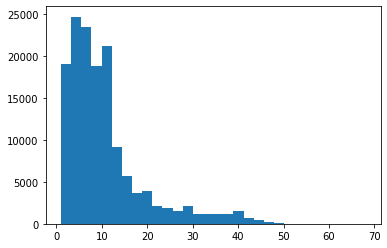

In [42]:
# 패딩을 위해 각 리뷰의 길이 분포 및 길이의 평균값 확인
print('최대 리뷰 길이: ', max(len(review) for review in train_feature))
print('평균 리뷰 길이: ', sum(map(len, train_feature))/len(train_feature))

plt.hist([len(review) for review in train_feature], bins=30)
plt.show()

In [29]:
# max_len 이하인 샘플의 비율(%)을 확인하는 하수
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [36]:
max_len = 30
below_threshold_len(max_len, train_feature)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 100.0


In [37]:
# from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences

max_len = 30
train_feature = pad_sequences(train_feature, maxlen = max_len)

In [38]:
train_feature

array([[    0,     0,     0, ...,    16,   256,   649],
       [    0,     0,     0, ...,   947,   665,    19],
       [    0,     0,     0, ...,     2,   218,     9],
       ...,
       [    0,     0,     0, ..., 10442, 10378,  1029],
       [    0,     0,     0, ...,  1209,   532,  7826],
       [    0,     0,     0, ...,    57,  1341,     1]], dtype=int32)

## 3. 모델링
### 1) train 데이터 셋 분할

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

In [40]:
X = train_feature
y = train_label

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=777)

print(f"X_train.shape : {X_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"X_valid.shape : {X_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

X_train.shape : (101563, 30)
y_train.shape : (101563,)
X_valid.shape : (43528, 30)
y_valid.shape : (43528,)


### 2) test 데이터 셋 전처리

In [53]:
test

,document
0,굳 ㅋ
1,GDNTOPCLASSINTHECLUB
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네


In [41]:
# test 전처리
test['document'] = test['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', regex=True) # 한글과 공백을 제외하고 모두 제거
test['document'] = test['document'].str.replace('^ +', '', regex=True) # 다중 공백 제거
test['document'].replace('', np.nan, inplace=True) # 빈값을 결측값(NaN)으로 변경

# 전처리된 test의 개수 확인
print("전처리 후 테스트 데이터셋의 개수 :", len(test))

전처리 후 테스트 데이터셋의 개수 : 50000


In [42]:
# test의 결측치 처리 방법: 결측값을 바로 위 값과 동일하게 변경
test = test.fillna(method = 'ffill')

In [43]:
# 토큰화 + 불용어 제거
test_feature = [] # 빈 리스트 생성 : 토큰화 + 불용어 제거가 적용된 stopwords_removed_sentence를 저장하기 위함
for sentence in tqdm(test['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in add_stopwords] # 불용어 제거
    test_feature.append(stopwords_removed_sentence) # test_feature 리스트에 추가

100%|██████████| 50000/50000 [18:10<00:00, 45.85it/s]


In [ ]:
# 정수 시퀀스로 변환 전 (텍스트 시퀀스)
test_feature[:5]

0                                                  굳 ㅋ
1                                 GDNTOPCLASSINTHECLUB
2               뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                     지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4    3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
Name: document, dtype: object

In [44]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
test_feature = tokenizer.texts_to_sequences(test_feature)

In [46]:
# test 데이터 패딩 수행
# from keras.preprocessing.sequence import pad_sequences

test_feature_pad = pad_sequences(test_feature, maxlen = max_len)
test_feature_pad

array([[   0,    0,    0, ...,    0,  735,   86],
       [   0,    0,    0, ...,    0,  735,   86],
       [   0,    0,    0, ...,   46,  774,   18],
       ...,
       [   0,    0,    0, ...,    2, 3314,   22],
       [   0,    0,    0, ...,   21, 2488,  141],
       [   0,    0,    0, ...,    0,  907, 1218]], dtype=int32)

In [47]:
print(len(train_feature))
print(len(train_label))
print(len(test_feature))
print(len(submission))

145091
145091
50000
50000


In [48]:
print(f"train_feature.shape : {train_feature.shape}")
print(f"train_label.shape : {train_label.shape}")
print(f"test_feature.shape : {test_feature_pad.shape}")
print(f"sample_submission.shape : {submission.shape}")

train_feature.shape : (145091, 30)
train_label.shape : (145091,)
test_feature.shape : (50000, 30)
sample_submission.shape : (50000, 2)


### 3) 모델링 후보군 선정
#### (1) model1 나이브 베이즈 모형 + CountVectorizer
- CountVectorizer: 각 단어가 문서에서 몇 번 등장했는지를 기반으로 문서를 벡터화함
    - 하지만 'a', 'the'처럼 많이 등장하는 것에 대해 높은 중요도가 있다가 판단하기에 한계점 존재

In [50]:
# 나이브 베이즈 모형으로 학습
# model1 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('mb', MultinomialNB())
# ])
model1 = MultinomialNB()

model1.fit(X_train, y_train)

# classification_report을 이용한 성능 평가
# support: 각 라벨의 실제 샘플 개수
# macro avg: 각 클래스 별로 동일한 가중치 부여(샘플 개수의 불균형을 고려하지 않음) → 소수 클래스에 대한 성능이 낮을 때 더 큰 패널티 발생
# f1 macro avg = (0.81+0.08)/2 = 0.80
# weighted avg: 각 클래스에 속하는 표본의 개수로 가중 평균 계산(샘플 개수의 불균형 고려) → 샘플 개수가 적은 클래스의 영향력 감소
print('사용 모델: 나이브 베이즈 모델')
print(classification_report(y_valid, model1.predict(X_valid)))

# calculate f1
mean_f1 = f1_score(y_valid, model1.predict(X_valid), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: 나이브 베이즈 모델
              precision    recall  f1-score   support

           0       0.51      0.44      0.48     21977
           1       0.50      0.57      0.53     21551

    accuracy                           0.51     43528
   macro avg       0.51      0.51      0.50     43528
weighted avg       0.51      0.51      0.50     43528

mean_f1 : 0.5058812718250322


#### (2) model2 logistic regression + CountVectorizer

In [52]:
from sklearn.linear_model import LogisticRegression
# model2 = Pipeline([
#     ('vect', CountVectorizer()), # 각 텍스트에서 단어 출현 횟수를 카운팅한 벡터
#     ('clf', LogisticRegression())
# ])

model2 = LogisticRegression()

model2.fit(X_train, y_train)

# classification_report을 이용한 성능 평가
print('사용 모델: 로지스틱 회귀분석')
print(classification_report(y_valid, model2.predict(X_valid)))

# calculate f1
mean_f1 = f1_score(y_valid, model1.predict(X_valid), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: 로지스틱 회귀분석
              precision    recall  f1-score   support

           0       0.51      0.87      0.64     21977
           1       0.53      0.15      0.24     21551

    accuracy                           0.51     43528
   macro avg       0.52      0.51      0.44     43528
weighted avg       0.52      0.51      0.44     43528

mean_f1 : 0.5058812718250322


#### (3) model3 LinearSVC + CountVectorizer + TfidfTransformer
- TfidfTransformer(TF-IDF): 중요하지 않은 단어에 가중치를 조금만 주어서 문서 벡터의 방향이 좀 더 중요한 단어들에 의해 좌우도리 수 있도록함

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.svm import LinearSVC

# model3 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()), # TF-IDF라는 값을 사용하여 CountVectorizer의 단점을 보완함
#     ('clf', LinearSVC())
# ])

model3 = LinearSVC()

model3.fit(X_train, y_train)

# classification_report을 이용한 성능 평가
print('사용 모델: SVM')
print(classification_report(y_valid, model3.predict(X_valid)))

# calculate f1
mean_f1 = f1_score(y_valid, model3.predict(X_valid), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: SVM
              precision    recall  f1-score   support

           0       0.52      0.48      0.50     21977
           1       0.50      0.54      0.52     21551

    accuracy                           0.51     43528
   macro avg       0.51      0.51      0.51     43528
weighted avg       0.51      0.51      0.51     43528

mean_f1 : 0.5098097776144092


#### (4) model4 LinearSVC + CountVectorizer + TfidfTransformer
- Pipeline with Cross-Validation (GridSearchCV)

In [56]:
# model4 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()), # TF-IDF라는 값을 사용하여 CountVectorizer의 단점을 보완함
#     ('clf', LinearSVC())
# ])

# param_grid = [
#     {
#         'vect__max_df': [.8, .9, 1.],
#         'clf__penalty': ['l2'],
#         'clf__dual': [True, False]
#     },
#     {
#         'vect__max_df': [.8, .9, 1.],
#         'clf__penalty': ['l2'],
#         'clf__dual': [True, False]
#     }
# ]

model4 = LinearSVC()

param_grid = [
    {
        'dual': [True, False]
    }
]

gs = GridSearchCV(estimator=model4, cv=3, param_grid=param_grid, scoring='f1_micro')
gs.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_)) 

# 최적 파라미터를 이용해 새로운 모델 생성
opt_model4 = gs.best_estimator_

Best: 0.521213 using {'dual': False}


In [57]:
# classification_report을 이용한 성능 평가
print('사용 모델: SVM')
print(classification_report(y_valid, opt_model4.predict(X_valid)))

# calculate f1
mean_f1 = f1_score(y_valid, opt_model4.predict(X_valid), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: SVM
              precision    recall  f1-score   support

           0       0.53      0.37      0.44     21977
           1       0.51      0.66      0.58     21551

    accuracy                           0.52     43528
   macro avg       0.52      0.52      0.51     43528
weighted avg       0.52      0.52      0.51     43528

mean_f1 : 0.5179195000918949


#### (5) model5 나이브 베이즈 모형 + CountVectorizer + TfidfTransformer
- Pipeline with Cross-Validation (GridSearchCV)

In [58]:
# 나이브 베이즈 모형으로 학습
# model5 = Pipeline([
#     ('vect', CountVectorizer()),
#     ('mb', MultinomialNB())
# ])

# param_grid = [
#     {
#         'vect__max_df': [.8, .9, 1.],
#         'mb__alpha': [0.25, 0.5 ,1],
#         'mb__fit_prior': [True, False]
#     },
#     {
#         'vect__max_df': [.8, .9, 1.],
#         'mb__alpha': [0.25, 0.5 ,1],
#         'mb__fit_prior': [True, False]
#     }
# ]

model5 = MultinomialNB()

param_grid = [
    {
        'fit_prior': [True, False]
    }
]

gs = GridSearchCV(estimator=model5, cv=3, param_grid=param_grid, scoring='f1_micro')
gs.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_)) 

# 최적 파라미터를 이용해 새로운 모델 생성
opt_model5 = gs.best_estimator_

Best: 0.508945 using {'fit_prior': False}


In [59]:
# classification_report을 이용한 성능 평가
print('사용 모델: 나이브 베이즈 모델')
print(classification_report(y_valid, opt_model5.predict(X_valid)))

# calculate f1
mean_f1 = f1_score(y_valid, opt_model5.predict(X_valid), average='micro')
print("mean_f1 :", mean_f1)

사용 모델: 나이브 베이즈 모델
              precision    recall  f1-score   support

           0       0.51      0.44      0.48     21977
           1       0.50      0.57      0.53     21551

    accuracy                           0.51     43528
   macro avg       0.51      0.51      0.50     43528
weighted avg       0.51      0.51      0.50     43528

mean_f1 : 0.5058812718250322


총 5개의 모델 성능 평가 결과, model1의 성능이 높게 측정되었음

In [60]:
submission.head()

,id,label
0,1,-1
1,2,-1
2,3,-1
3,4,-1
4,5,-1


In [61]:
model4_df = submission.copy()
model4_df

,id,label
0,1,-1
1,2,-1
2,3,-1
3,4,-1
4,5,-1
...,...,...
49995,49996,-1
49996,49997,-1
49997,49998,-1
49998,49999,-1


In [63]:
# 테스트 데이터를 이용한 예측 y값 생성
y_pred = opt_model4.predict(test_feature_pad)
y_pred[:15]

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [64]:
# 예측된 값을 정답 파일과 병합
submission['label'] = y_pred

# 정답파일 데이터프레임 확인
submission.head()

,id,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0


In [66]:
# 제출 데이터 저장
submission.to_csv('/content/sample_data/opt_model4_mine.csv', index=False)